Saving processed_clean.csv to processed_clean (13).csv


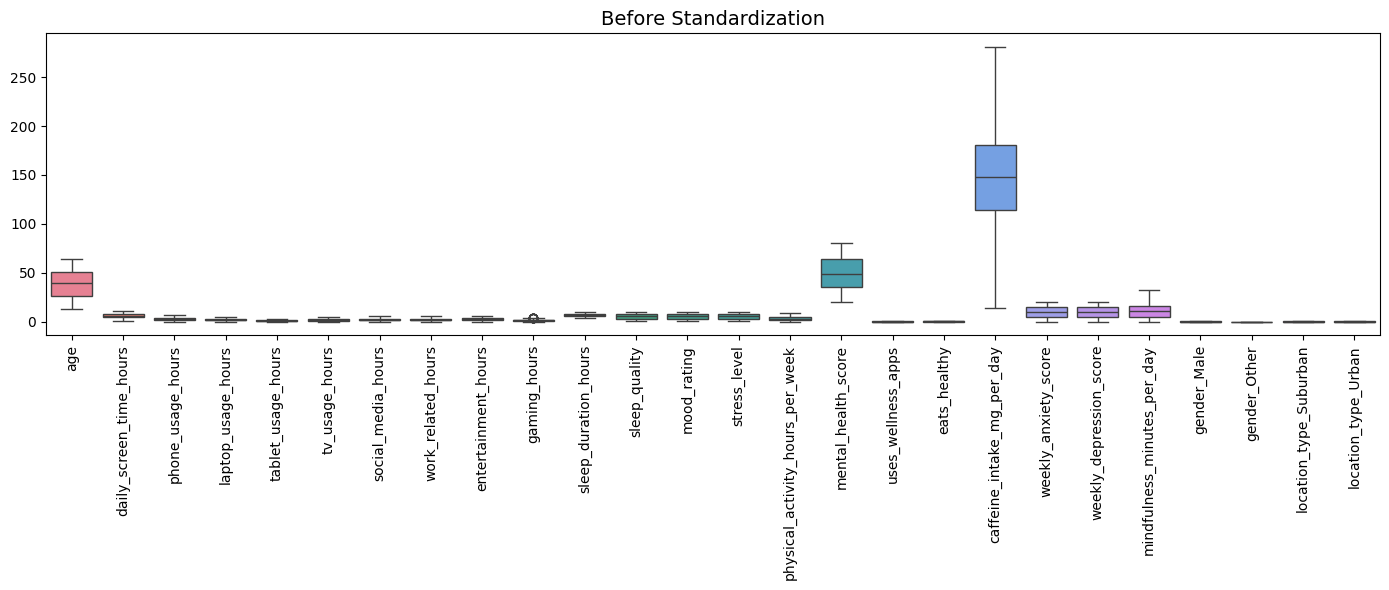

Scaled dataset preview:
        age  daily_screen_time_hours  phone_usage_hours  laptop_usage_hours  \
0  0.817026                -0.624735           0.261120           -0.702817   
1  1.688020                -1.083588           0.330300           -0.199979   
2  0.147031                 2.281335          -0.638221            0.604562   
3 -0.790963                 1.414613          -2.091003           -2.010196   
4  1.085024                -0.063914          -0.914942           -0.903952   

   tablet_usage_hours  tv_usage_hours  social_media_hours  work_related_hours  \
0            1.228251        0.101537            1.826081           -0.008881   
1           -0.194041        0.519815            0.586319            0.977913   
2           -0.600410        0.728955            0.851982            0.708787   
3           -0.600410        1.042663            1.117645           -0.367715   
4            1.025066        0.101537           -0.830552            1.426456   

   entertainme

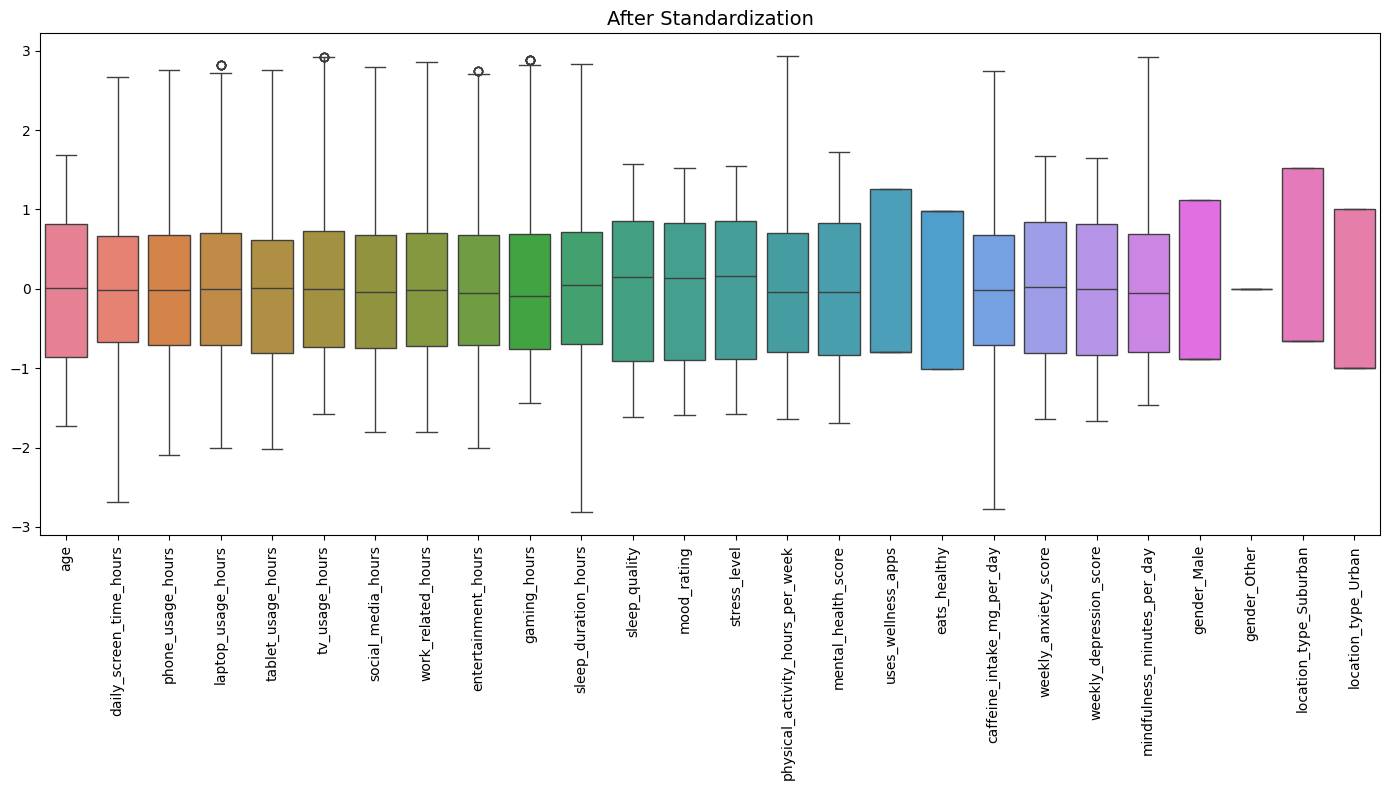

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

# ------------------- Upload file -------------------
uploaded = files.upload()

# Automatically get the first uploaded file name
filename = list(uploaded.keys())[0]

# Load CSV into DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Drop 'user_id' if it exists
if 'user_id' in df.columns:
    df = df.drop(columns=['user_id'])

# ------------------- Boxplot BEFORE Standardization -------------------
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(14,6))
sns.boxplot(data=df[continuous_cols])
plt.title("Before Standardization", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ------------------- Standardization -------------------
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[continuous_cols] = scaler.fit_transform(df[continuous_cols])

print("Scaled dataset preview:")
print(df_scaled.head())

# ------------------- Boxplot AFTER Standardization -------------------
plt.figure(figsize=(14,8))
sns.boxplot(data=df_scaled[continuous_cols])
plt.title("After Standardization", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
